# Laptop Price Prediction Using Regression 

## 1. Introduction:

In the rapidly evolving landscape of technology, laptops have become an indispensable part of our daily lives. From students and professionals to pro-gamers and creatives, laptops cater a diverse range of needs. However, with the multitude of options available in the market, determining the right laptop that suits one's requirements and budget can be a daunting task.

Understanding the pivotal role that price plays in the decision-making process of buying them, the **Laptop Price Prediction Using Regression Project** emerges as a groundbreaking initiative poised to simplify this scenario.

This project using the online data of Laptop Price, delves insight information of the dataset, then using several regression analysis to give out the robust prediction model to predict laptop prices accurately. This model will empower consumers, retailers, and manufacturers alike, enabling them to make informed decisions based on reliable price estimates.

## 2. Loading data:

We begin the analysis by loading the data set to get a better understading of the data

### 2.1 Import Libraries

In [1]:
# Import all the Required libraries 

# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objs as go

# Import Statistics libraries
from scipy import stats
from scipy.stats import norm

# Model Building
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline, make_pipeline

# visualisation modifiers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### 2.2 Load Dataset

In [2]:
data = pd.read_csv('laptop_data_cleaned.csv')
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


## 3. Data Preprocessing:

### 3.1 Data Cleaning




In [3]:
data.shape

(1273, 13)

The dataset has total **1273 entries** and **13 variables**. Below is the variables's dictionary in the dataset.


| Variable Name      | Type of Variable | Explanation |
| ----------- | :-----------: | ----------- |
| `Company`     | chr       | The brand of that laptop |
| `TypeName`   | chr        | The categories of which type the laptop is|
| `Ram`   | int        | RAM of the laptop |
| `Weight`   | int       | How heavy the laptop is (kg)|
| `Price`   | int        | The total price of that computer|
| `TouchScreen`   | int        | Define whether the laptop's screen has touch screen or not|
| `Ips`   | int        | Define whether the laptop has the In Plane Switching (IPS) display or not|
| `Ppi`   | int        | Laptop's pixel per inches |
| `Cpu_brand`   | chr        | The brand of CPU|
| `HDD`   | int        | Hard disk drives of the laptop|
| `SSD`   | int        | Solid-state drive of the laptop|
| `Gpu_brand`   | chr        | The brand of GPU|
| `Os`   | chr        | The catrgories of which type of Operating System the laptop is|


#### 3.1.1 Check null
First, we have to check if the data contains `null` value or not

In [4]:
data.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

There is no `null` values in this dataset.

#### 3.1.2 Check Duplicates


In [5]:
data.duplicated().sum()

1

There is one duplicate value in this dataset. Then, we drop the duplicate value to clean the data.

In [6]:
data = data.drop_duplicates()
data.shape

(1272, 13)

After dropping the duplicate value, the dataset has **1272 entries** and **13 different variables**.

### 3.2 Data Summary

In [7]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


#### 3.2.1 Data shape

In [8]:
data.shape

(1272, 13)

#### 3.2.2 Unique Value in each variables

In [9]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Company: 19 distinct values
TypeName: 6 distinct values
Ram: 9 distinct values
Weight: 171 distinct values
Price: 791 distinct values
TouchScreen: 2 distinct values
Ips: 2 distinct values
Ppi: 39 distinct values
Cpu_brand: 5 distinct values
HDD: 6 distinct values
SSD: 13 distinct values
Gpu_brand: 3 distinct values
Os: 3 distinct values


#### 3.2.3 Describe data variables

In [10]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,8.451258,2.041761,10.828035,0.147013,0.279874,146.936126,414.040881,186.298742
std,5.099249,0.669088,0.619774,0.354258,0.449114,42.940459,518.128204,186.597777
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


#### 3.2.4 Describe correlation between variables in dataset

In [11]:
data.corr(numeric_only = True)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.388629,0.681019,0.113073,0.202473,0.295336,0.096845,0.599540
Weight,0.388629,1.000000,0.151861,-0.292900,0.023368,-0.319291,0.510531,-0.057331
Price,0.681019,0.151861,1.000000,0.194436,0.279483,0.480621,-0.097155,0.658962
TouchScreen,0.113073,-0.292900,0.194436,1.000000,0.136800,0.452313,-0.205431,0.252067
Ips,0.202473,0.023368,0.279483,0.136800,1.000000,0.289112,-0.090839,0.215085
Ppi,0.295336,-0.319291,0.480621,0.452313,0.289112,1.000000,-0.290595,0.500062
HDD,0.096845,0.510531,-0.097155,-0.205431,-0.090839,-0.290595,1.000000,-0.400937
SSD,0.599540,-0.057331,0.658962,0.252067,0.215085,0.500062,-0.400937,1.000000


<Axes: >

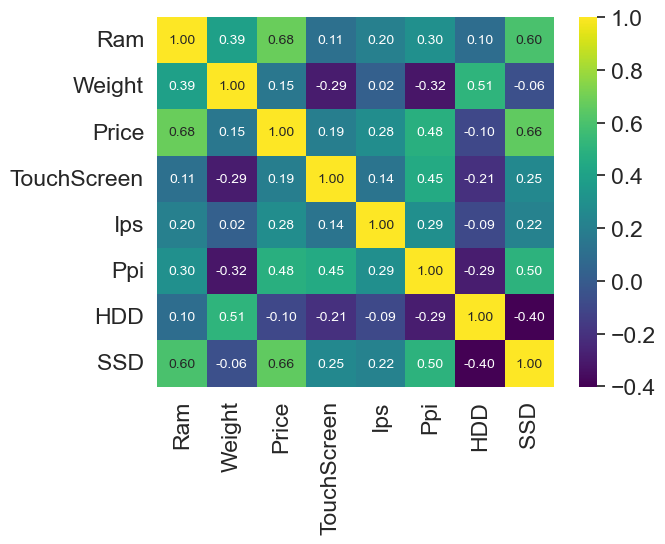

In [12]:
sns.heatmap(data.corr(numeric_only=True), cmap= "viridis", annot = True, fmt = ".2f", annot_kws={"size":10})

Analyzing the heatmap presented, several valuable insights can be gleaned:

- **RAM and SSD**: The heatmap reveals a robust positive correlation between RAM, SSD size, and Price. This implies that laptops with larger RAM capacity and extensive SSD storage tend to command higher prices in the market.

- **Display Quality**: Factors such as touch screen capability, IPS (In-Plane Switching) technology, and PPI (Pixels Per Inch) exhibit positive correlations with Price. This indicates that laptops boasting superior display features are associated with elevated price points, reflecting the importance consumers place on high-quality visuals.

- **Weight**: Interestingly, weight demonstrates a weak positive correlation with Price. This suggests that the weight of a laptop has a limited impact on its pricing, indicating that consumers may prioritize other specifications over the device's portability.

- **HDD**: Among the variables considered, HDD (Hard Disk Drive) stands out with a weak negative correlation with Price. This implies that laptops equipped with HDD storage options tend to have slightly lower prices compared to their SSD counterparts.

## 4. Exploratory Data Analysis:

### 4.1 Univariative Analysis

#### 4.1.1 Laptop Counts based on Company Type

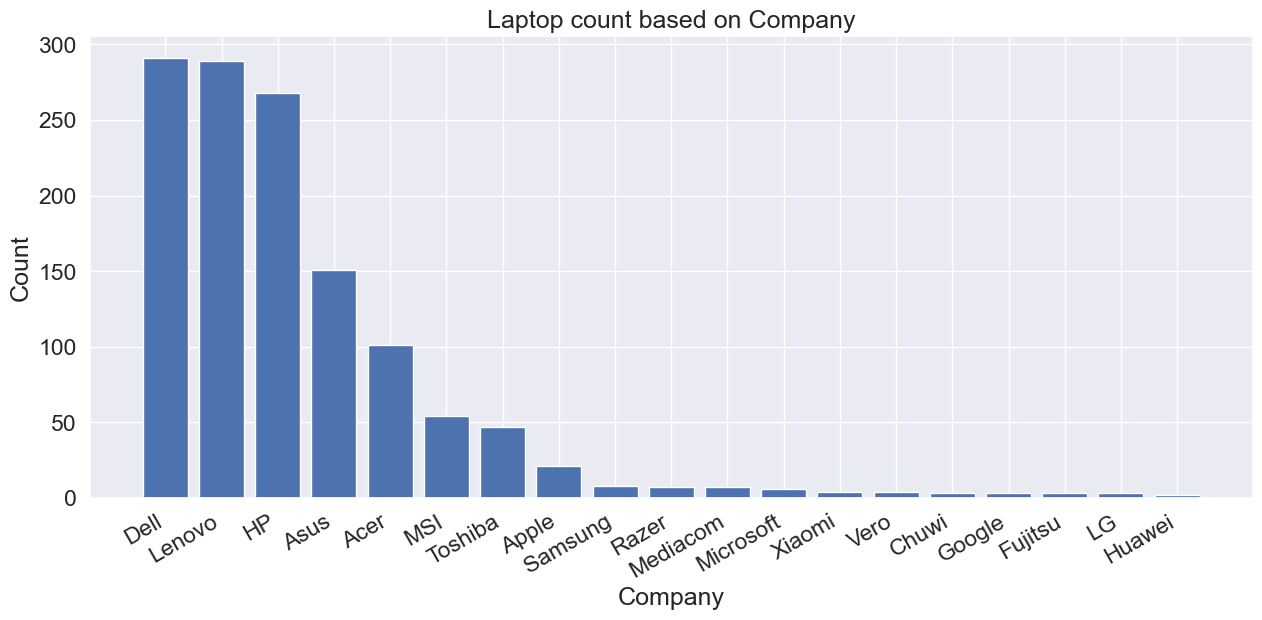

In [13]:
value_counts = data["Company"].value_counts()

value_counts_values = value_counts.values[:]
value_counts_index = value_counts.index[:]

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(value_counts_index, value_counts_values)
ax.set_xlabel("Company")
ax.set_ylabel("Count")
ax.set_title("Laptop count based on Company")
plt.xticks(rotation=30, ha='right')
plt.show()

#### 4.1.2 Distribution of Laptop's Price

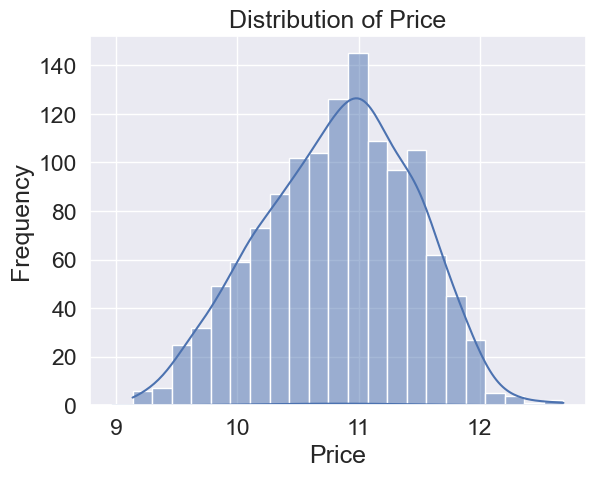

In [14]:
columns = ['Price']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

#### 4.1.3 Price Distribution across Different Type of Laptop

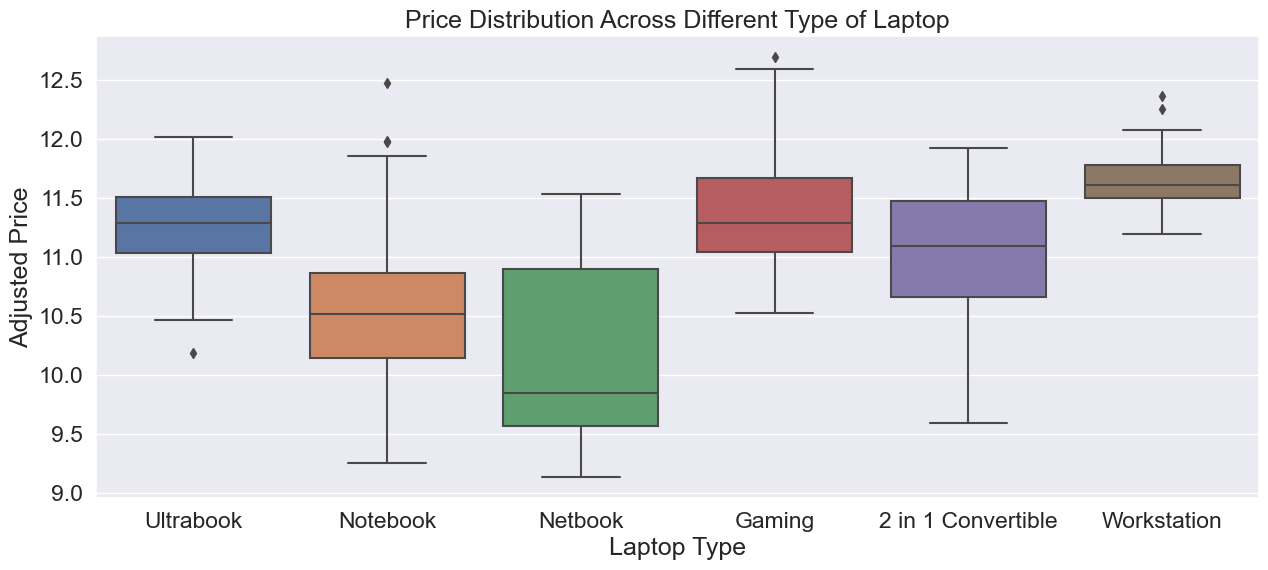

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='TypeName', y='Price')
plt.title('Price Distribution Across Different Type of Laptop')
plt.xlabel('Laptop Type')
plt.ylabel('Adjusted Price')
plt.show()

#### 4.1.4 Scatter Plot for relationship between RAM and Price of Laptop

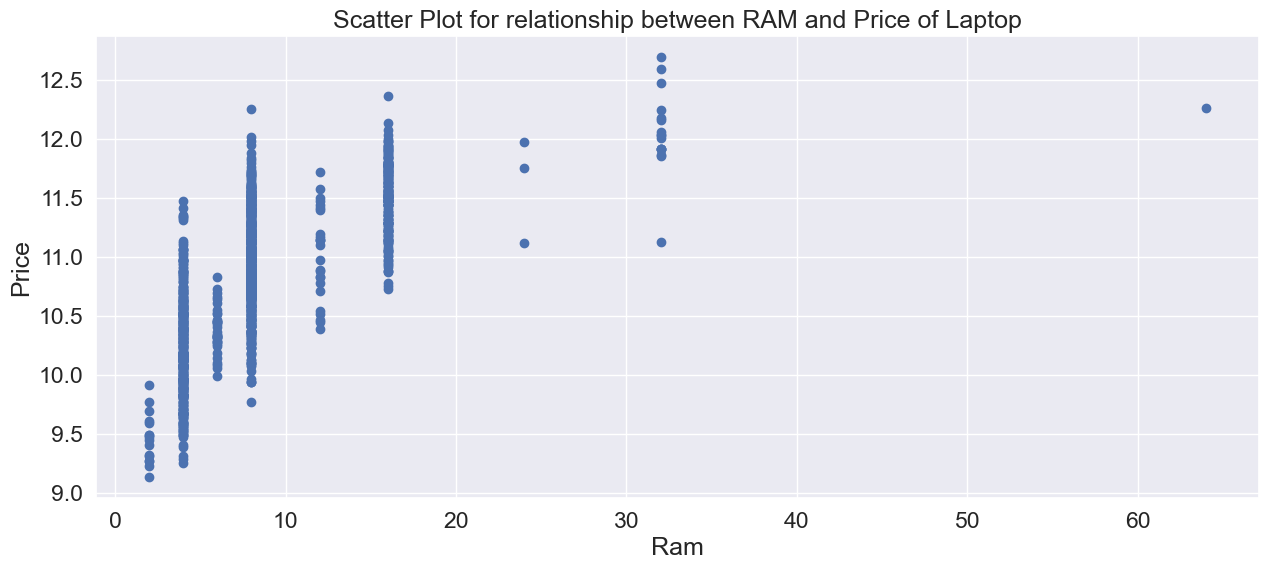

In [16]:
plt.figure(figsize=(15, 6))
plt.scatter(data=data, x='Ram', y='Price')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title("Scatter Plot for relationship between RAM and Price of Laptop")
plt.show()

### 4.2 Bivariative Analysis
#### 4.2.1 Median Price by Company and Type of Laptop

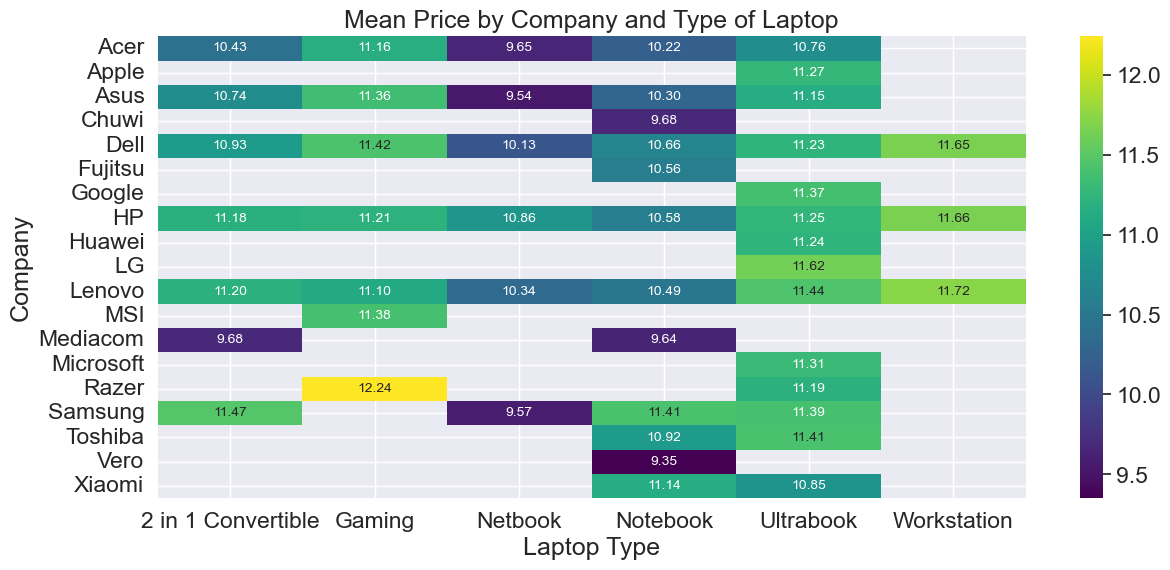

In [17]:
df = data.copy()

#  Median salary by job title
pivot_table = df.pivot_table(values='Price', index='Company', columns='TypeName', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap= "viridis", annot = True, fmt = ".2f", annot_kws={"size":10})
plt.title('Mean Price by Company and Type of Laptop')
plt.xlabel('Laptop Type')
plt.ylabel('Company')
plt.show()

#### 4.2.2 Mean Price by RAM and SSD

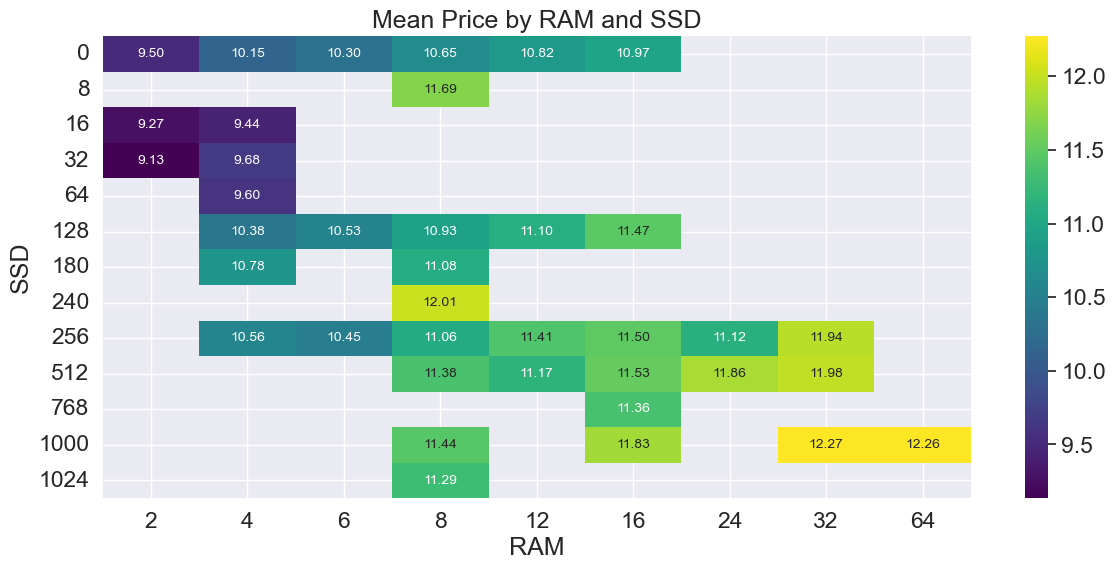

In [18]:
df = data.copy()

#  Median salary by job title
pivot_table = df.pivot_table(values='Price', index='SSD', columns='Ram', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap= "viridis", annot = True, fmt = ".2f", annot_kws={"size":10})
plt.title('Mean Price by RAM and SSD')
plt.xlabel('RAM')
plt.ylabel('SSD')
plt.show()

## 5. Finding Models
In this project, we will find out between `LinearRegression`, `DecisionTreeRegressor`, and `RandomForestRegressor` which one could bring out the best prediction for Laptop Price.

### 5.1 Creating Models

In [19]:
# Separate X and y
X = data.drop(columns=["Price"])
y= data["Price"]


In [20]:
object_features = list(X.select_dtypes(['object']).columns)
object_features

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [21]:
X = pd.get_dummies(X, columns=['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], dtype = int)
X.head()


,Ram,Weight,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_AMD Processor,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Windows
0,8,1.37,0,1,226.983005,0,128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,8,1.34,0,0,127.677940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,8,1.37,0,1,226.983005,0,256,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 197)

In [23]:
print(f"X_train shape : {X_train.shape}\ny_train shape : {y_train.shape}\nX_test shape : {X_test.shape}\ny_test shape : {y_test.shape}")

X_train shape : (1017, 43)
y_train shape : (1017,)
X_test shape : (255, 43)
y_test shape : (255,)


### 5.2 Standard Scaler

In [24]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 5.3 Linear Regression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_test_predicted = lr.predict(X_test)

In [26]:
#Test R-squared score
r2_score_lr_y_test = r2_score(y_test, y_lr_test_predicted)
print(f"R-squared Score for LinearRegression: {r2_score_lr_y_test}")

R-squared Score for LinearRegression: 0.797409648994701


### 5.4 Decision Tree Regressor

In [27]:
dt = DecisionTreeRegressor(random_state= 0)
dt.fit(X_train, y_train)
y_dt_test_predicted = dt.predict(X_test)
y_dt_train_predicted = dt.predict(X_train)

In [28]:
r2_score_dt_y_test = r2_score(y_test, y_dt_test_predicted)
print(f"R-squared Score for LinearRegression on Test Set: {r2_score_dt_y_test}")

R-squared Score for LinearRegression on Test Set: 0.7522840200603925


In [29]:
r2_score_dt_y_train = r2_score(y_train, y_dt_train_predicted)
print(f"R-squared Score for LinearRegression on Training Set: {r2_score_dt_y_train}")

R-squared Score for LinearRegression on Training Set: 0.9965818185913213


Based on the result above, we could see that there is an overfitting in this model. To fix that, I will use `GridSearchCV` to find the best hyperparameter.

In [30]:
param_grid = {"splitter":["best","random"],
            "max_depth" : np.arange(1, 16),
            "min_samples_split" : [2,3,4,5,6,7,8,9,10],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[5, 10, 15, 20, 30, 40, 50] }
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv = 5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'max_leaf_nodes': [5, 10, 15, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [31]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'splitter': 'best'}

In [32]:
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=8,
                      random_state=0)

In [33]:
dtr = DecisionTreeRegressor(
    max_depth = 10,
    max_leaf_nodes = 50,
    min_samples_leaf = 8,
    min_samples_split = 2,
    random_state = 0
)

dtr.fit(X_train, y_train)
y_dtr_train_predicted = dtr.predict(X_train)
y_dtr_test_predicted = dtr.predict(X_test)


r2_score_dtr_y_train = r2_score(y_train, y_dtr_train_predicted)
r2_score_dtr_y_test = r2_score(y_test, y_dtr_test_predicted)

print(f"R-squared Score for LinearRegression on Training Set: {r2_score_dtr_y_train}")
print(f"R-squared Score for LinearRegression on Testing Set: {r2_score_dtr_y_test}")


R-squared Score for LinearRegression on Training Set: 0.8738065696804417
R-squared Score for LinearRegression on Testing Set: 0.7990789971495843


### 5.5 Random Forest Regressor

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf_train_predicted = rf.predict(X_train)
y_rf_test_predicted = rf.predict(X_test)

In [35]:
r2_score_rf_y_train = r2_score(y_train, y_rf_train_predicted)
r2_score_rf_y_test = r2_score(y_test, y_rf_test_predicted)
print(f"R-squared Score for LinearRegression on Traing Set: {r2_score_rf_y_train}")
print(f"R-squared Score for LinearRegression on Testing Set: {r2_score_rf_y_test}")

R-squared Score for LinearRegression on Traing Set: 0.9805233551322555
R-squared Score for LinearRegression on Testing Set: 0.855474612621199


Based on the result above, we could see that there is an overfitting in this model. To fix that, I will use `GridSearchCV` to find the best hyperparameter.

In [36]:
tuned_param = {
    'n_estimators' : [10, 20, 30, 40, 50],
    "max_depth" : np.arange(1, 16),
    "min_samples_split" : [2,3,4,5,6,7,8,9,10],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
}
grid_search_rf = GridSearchCV(RandomForestRegressor(), tuned_param, cv = 5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 6750 candidates, totalling 33750 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=1)

In [37]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [38]:
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf

RandomForestRegressor(max_depth=13, n_estimators=50)

In [39]:
rfr = RandomForestRegressor(
    max_depth = 14,
    min_samples_split = 3,
    n_estimators = 50
)

rfr.fit(X_train, y_train)
y_rfr_train_predicted = rfr.predict(X_train)
y_rfr_test_predicted = rfr.predict(X_test)


r2_score_rfr_y_train = r2_score(y_train, y_rfr_train_predicted)
r2_score_rfr_y_test = r2_score(y_test, y_rfr_test_predicted)

print(f"R-squared Score for LinearRegression on Training Set: {r2_score_dtr_y_train}")
print(f"R-squared Score for LinearRegression on Testing Set: {r2_score_dtr_y_test}")

R-squared Score for LinearRegression on Training Set: 0.8738065696804417
R-squared Score for LinearRegression on Testing Set: 0.7990789971495843


### 5.6 Brief Conclusion

- `RandomForestRegressor` brings out the best performance.
- So we can use `RandomForestRegressor` for predicting the price of laptop in the future.

In [41]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(7)

,importance
Ram,0.603229
Weight,0.075142
Ppi,0.072339
Cpu_brand_Other Intel Processor,0.052351
TypeName_Notebook,0.033332
Cpu_brand_Intel Core i5,0.031173
SSD,0.026094


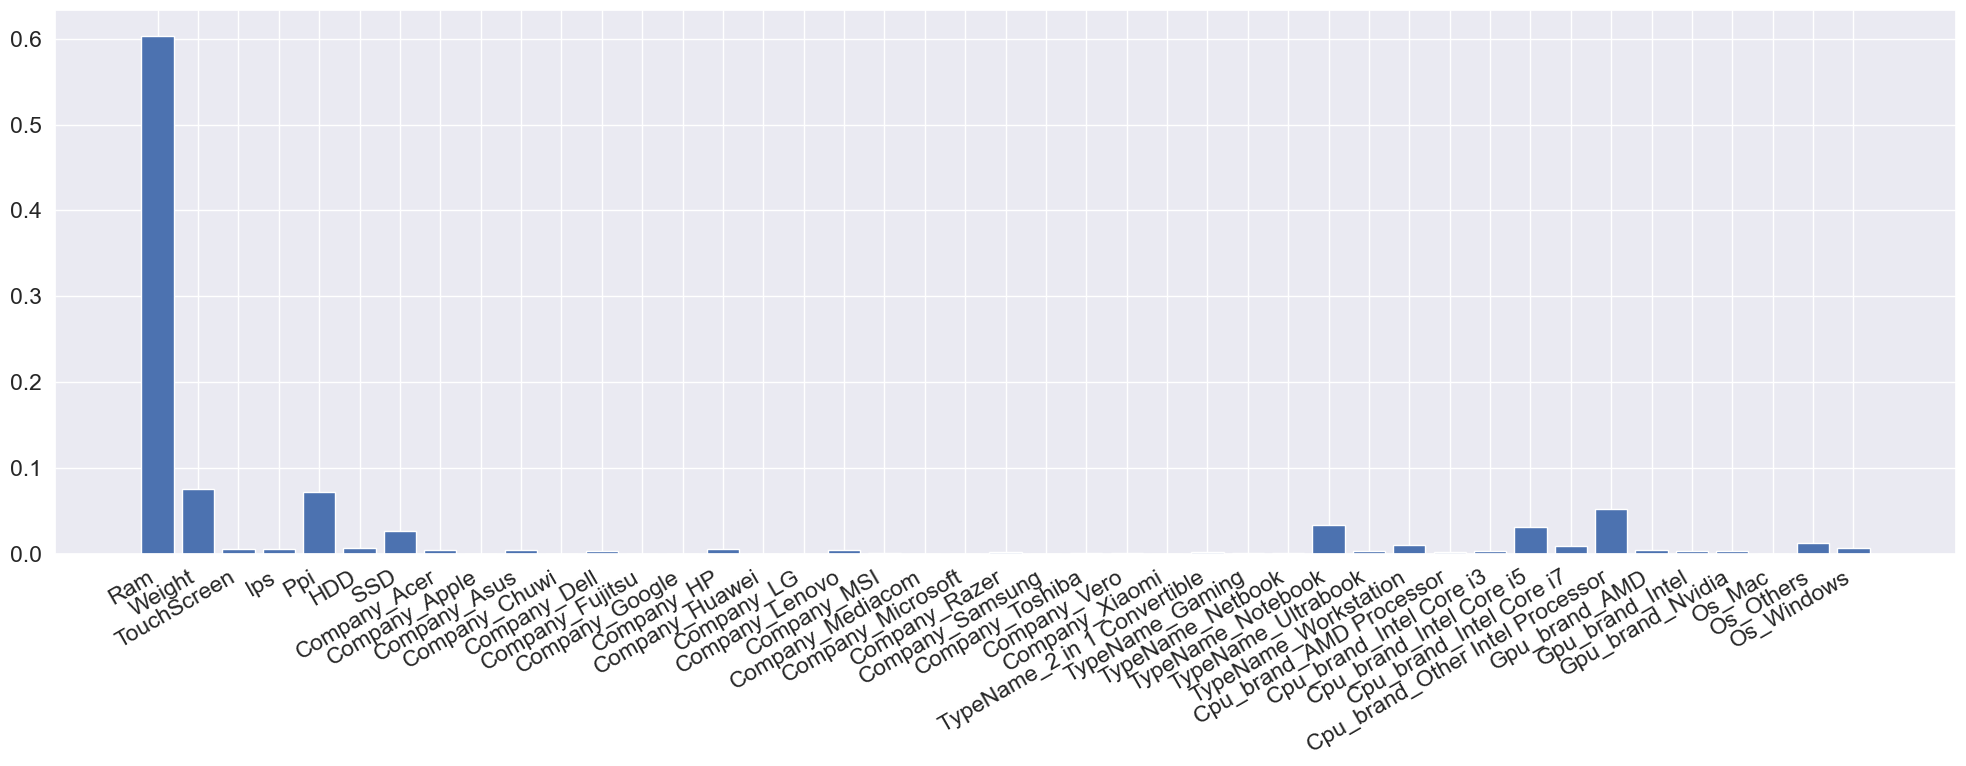

In [43]:
feature_names = X.columns
importances = rfr.feature_importances_
plt.bar(feature_names, importances)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

We can se that based on Random Forest Regressor, the `Ram` is the highest importance variables contributed to the model of the dataset.

## 6. Conclusion:

In summary, our project followed a systematic approach:

- **Data Understanding**: We started by gaining a comprehensive understanding of the dataset and the project's objectives.

- **Data Cleaning**: We meticulously cleaned the dataset by addressing missing and duplicate values, ensuring a high level of data quality.

- **Data Summary**: Post-cleaning, we generated descriptive statistics and correlation analyses to summarize the dataset's key aspects.

- **Exploratory Data Analysis (EDA)**: Utilizing visualizations, we delved deeper into the data, extracting valuable insights to inform our analysis.

- **Data Preparation**: We prepared the data for modeling by splitting it into training and testing sets, encoding categorical variables, and scaling numerical features.

- **Model Training**: Employing various Machine Learning Algorithms including `LinearRegression`, `DecisionTreeRegressor`, and `RandomForestRegressor`, we trained models to predict laptop prices. Through rigorous evaluation, `RandomForestRegressor` emerged as the most effective, boasting the highest R-squared score.

- **Feature Importance Analysis**: We examined the significance of each variable in predicting laptop prices, with RAM identified as the most influential factor.

**Therefore, based on these steps and our findings, we recommend employing Random Forest Regression for accurate laptop price predictions.**